In [1]:
import dataset_handler as dh
import testing_utils as tu
from termcolor import colored
import re

/home/CodeGen_env/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
priming_text_path = "data/priming_texts/gsm8k/codegen/func_eq_short.txt"
gsm8k_path = "data/grade-school-math/grade_school_math/data/train.jsonl"

current_dataset = dh.init_dataset_from_name(
        "gsm8k", primingtext_path=priming_text_path
    )

In [3]:
subset_data = current_dataset.data[:3000]

subset_data = [elem["question"] for elem in subset_data]

In [4]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

tu.set_all_seeds("codegen")

embedder = SentenceTransformer('all-mpnet-base-v2')

# Corpus with example sentences
corpus = subset_data
corpus_embeddings = embedder.encode(corpus)

# Perform kmean clustering
num_clusters = 3
clustering_model = KMeans(n_clusters=num_clusters, random_state=42)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster[0])
    print("")

Cluster  1
Julie is reading a 120-page book. Yesterday, she was able to read 12 pages and today, she read twice as many pages as yesterday. If she wants to read half of the remaining pages tomorrow, how many pages should she read?

Cluster  2
Natalia sold clips to 48 of her friends in April, and then she sold half as many clips in May. How many clips did Natalia sell altogether in April and May?

Cluster  3
Weng earns $12 an hour for babysitting. Yesterday, she just did 50 minutes of babysitting. How much did she earn?



In [5]:
def print_colored_pos(dist_list, pos):
    for i, dist in enumerate(dist_list):
        if i == pos:
            print(colored(dist, "cyan"))

In [6]:
def extract_eq(full_answer):
    eq_pattern = re.compile(r"<<([^>]+)>>")
    split_list = re.findall(eq_pattern, full_answer)

    eq_string = ""

    for i, eq in enumerate(split_list):
        eq_string += f" eq{i+1}: {eq}"

    return eq_string

In [7]:
import numpy as np
def print_cluster_closest(cluster_id):
    d = clustering_model.transform(corpus_embeddings)[:, cluster_id]
    ind = np.argsort(d)[::][:3]
    print(list(ind))
    for ex_i,i in enumerate(ind):
        #print_colored_pos(clustering_model.transform([corpus_embeddings[i]])[0], 1)
        print( f"def exercise{ex_i+1}():\n"
            + '    """'
            + current_dataset.data[i]["question"]
            + " Hint: use these equations"
            + extract_eq(current_dataset.data[i]["answer"])
            + '"""')
        print("\n")
        current_dataset.print_entry_from_idx(i)

In [8]:
#save to a pickle the clsutering model
import pickle
with open("clustering_model_3.pkl", "wb") as f:
    pickle.dump(clustering_model, f)

In [11]:
print_cluster_closest(2)

[2130, 1424, 120]
def exercise1():
    """Amelia has $60 to spend on her dinner at a restaurant. The first course costs $15 and the second course $5 more. The cost of the dessert is 25% of the price of the second course. How much money will Amelia have left after buying all those meals? Hint: use these equations eq1: 15+5=20 eq2: 25/100*20=5 eq3: 60-15-20-5=20"""


Amelia has $60 to spend on her dinner at a restaurant. The first course costs $15 and the second course $5 more. The cost of the dessert is 25% of the price of the second course. How much money will Amelia have left after buying all those meals?
The second course cost Amelia $15 + $5 = $<<15+5=20>>20.
The dessert cost 25/100 * $20 = $<<25/100*20=5>>5.
That leaves Amelia with $60 - $15 - $20 - $5 = $<<60-15-20-5=20>>20.
#### 20
20

----------------------------------------------------------------------------------------------------

def exercise2():
    """Christian and Sue wanted to get a $50.00 bottle of perfume for their mo

In [11]:
from sklearn.decomposition import PCA

pca = PCA(2)

df = pca.fit_transform(corpus_embeddings)

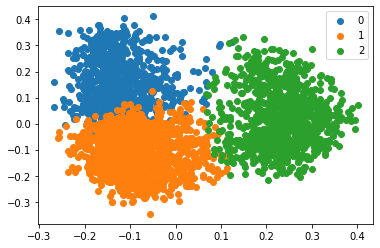

In [12]:
import matplotlib.pyplot as plt
#kmeans = KMeans(n_clusters= 8, random_state=0)
 
#predict the labels of clusters.
#label = kmeans.fit_predict(df)
 
#Getting unique labels
u_labels = np.unique(cluster_assignment)
 
#plotting the results:
for i in u_labels:
    plt.scatter(df[cluster_assignment == i , 0] , df[cluster_assignment == i , 1] , label = i)
plt.legend()
plt.show()